In [1]:
# author: Hayden Fuss, Jeremy McKenzie

%matplotlib inline
import matplotlib
import csv
import matplotlib.pyplot as plt
import time

time_fmt = "%m/%d/%Y %H:%M"

fields = []

medical = []
violent = []
petty = []
unsorted = []

def medicalReport(report):
    return '1' in report['MajorMed'] or '1' in report['YouthHealth']

def pettyReport(report):
    return '1' in report['Alcohol'] or '1' in report['SocDis'] or '1' in report['PrivateConflict']
    
def violentReport(report):
    return '1' in report['Violence'] or '1' in report['Guns']



with open('2010-14 Full CAD, Jan-Jun 2012.csv') as csvfile:
    reports = csv.DictReader(csvfile)
    fields = reports.fieldnames
    for r in reports:
        date = time.strptime(r['ENTRY_DT'], time_fmt) # converts string version of date into a date object
        #if date.tm_mon == 4:
        if medicalReport(r):
            medical.append(r)
        elif violentReport(r):
            violent.append(r)
        elif pettyReport(r):
            petty.append(r)
        else:
            unsorted.append(r)
            
with open('2010-14 Full CAD, Jan-Jun 2013.csv') as csvfile:
    reports = csv.DictReader(csvfile)
    for r in reports:
        date = time.strptime(r['ENTRY_DT'], time_fmt) # converts string version of date into a date object
        #if date.tm_mon == 4:
        if medicalReport(r):
            medical.append(r)
        elif violentReport(r):
            violent.append(r)
        elif pettyReport(r):
            petty.append(r)
        else:
            unsorted.append(r)

with open('911_medical_2012_2013.csv', 'wb') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fields)

    writer.writeheader()
    for f in medical:
        writer.writerow(f)
        
with open('911_violent_2012_2013.csv', 'wb') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fields)

    writer.writeheader()
    for f in violent:
        writer.writerow(f)

with open('911_petty_2012_2013.csv', 'wb') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fields)

    writer.writeheader()
    for f in petty:
        writer.writerow(f)
        
with open('911_unsorted_2012_2013.csv', 'wb') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fields)

    writer.writeheader()
    for f in unsorted:
        writer.writerow(f)

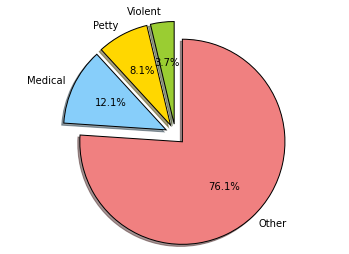

In [2]:
#source: http://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

labs = ['Violent', 'Petty', 'Medical', 'Other']
sizes = [len(violent), len(petty), len(medical), len(unsorted)]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0.1, 0.1, 0.1, 0.1)

plt.pie(sizes, explode=explode, labels=labs, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.savefig('percentages_911.png', dpi=100)
plt.show()